In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv('Sales advertising.csv')

In [5]:
# Display basic info
df.info()
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
        TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


In [7]:
# Display basic info and check for missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [9]:
# Selecting features and target
X = df.drop(columns=['Sales'])  # Assuming 'Sales' is the target column
y = df['Sales']

In [11]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }


In [15]:
# Display results
for model, metrics in results.items():
    print(f"{model} Performance:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 30)

Linear Regression Performance:
  MAE: 1.2748
  MSE: 2.9078
  RMSE: 1.7052
  R2 Score: 0.9059
------------------------------
Random Forest Performance:
  MAE: 0.9180
  MSE: 1.4374
  RMSE: 1.1989
  R2 Score: 0.9535
------------------------------


C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

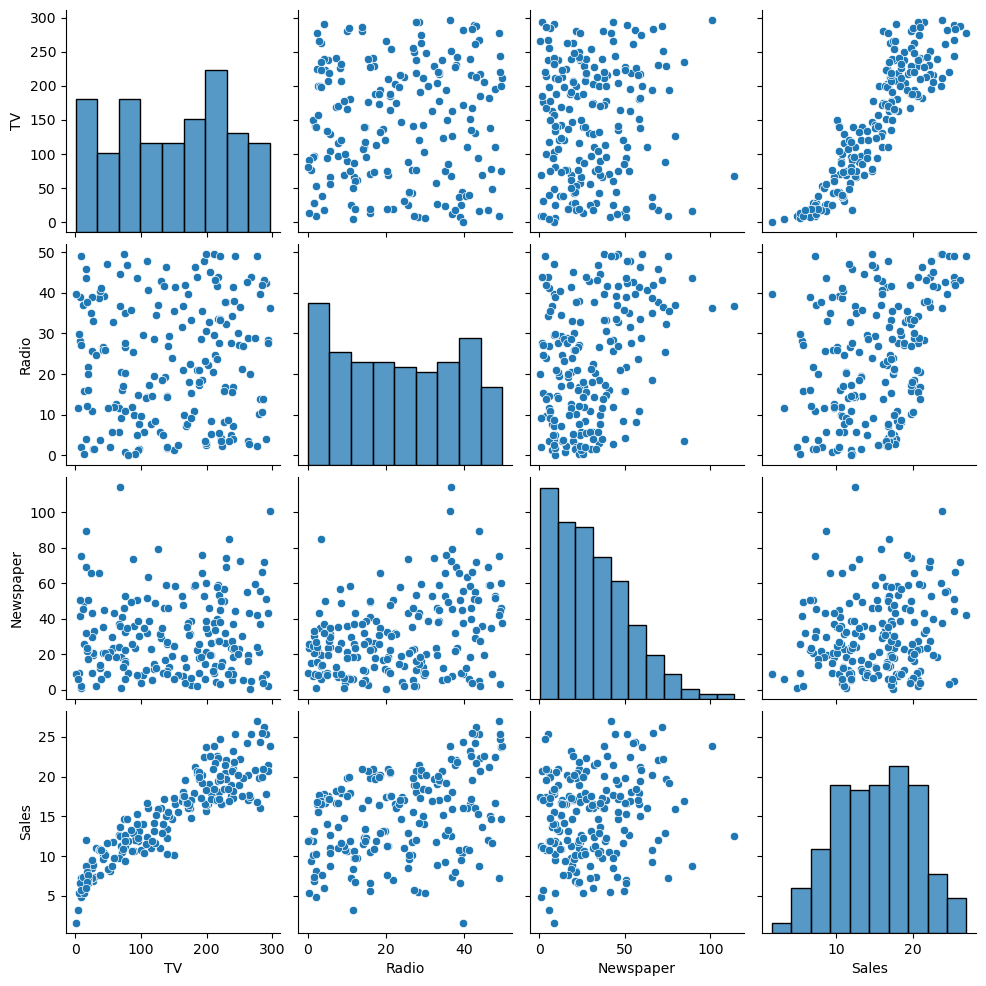

In [17]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot
sns.pairplot(df)

# Show the plot
plt.show()


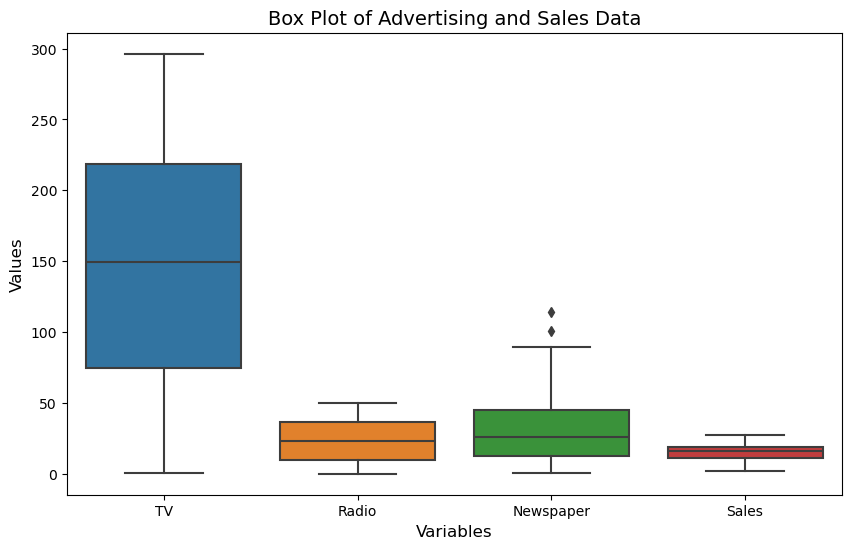

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot for all columns
sns.boxplot(data=df)

# Set title and labels
plt.title("Box Plot of Advertising and Sales Data", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Show the plot
plt.show()


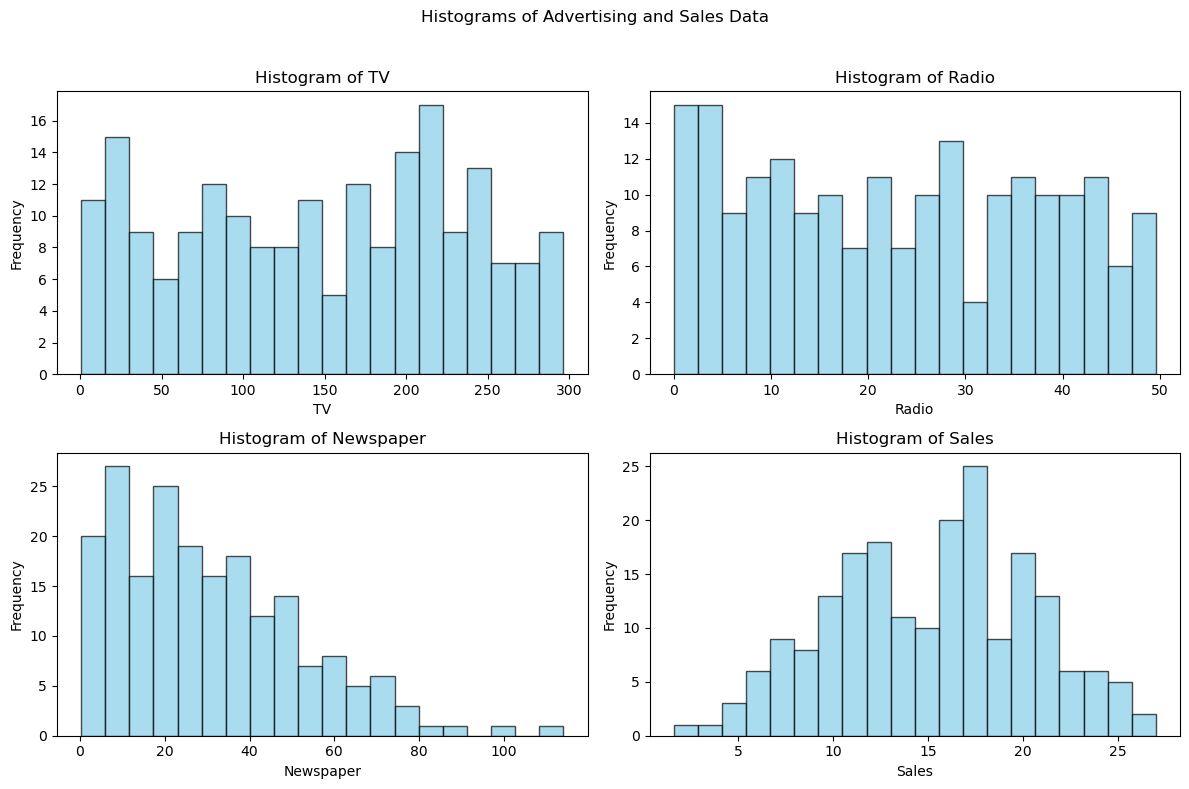

In [21]:

import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Histograms of Advertising and Sales Data")

# Define column names and corresponding axes
columns = ["TV", "Radio", "Newspaper", "Sales"]
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


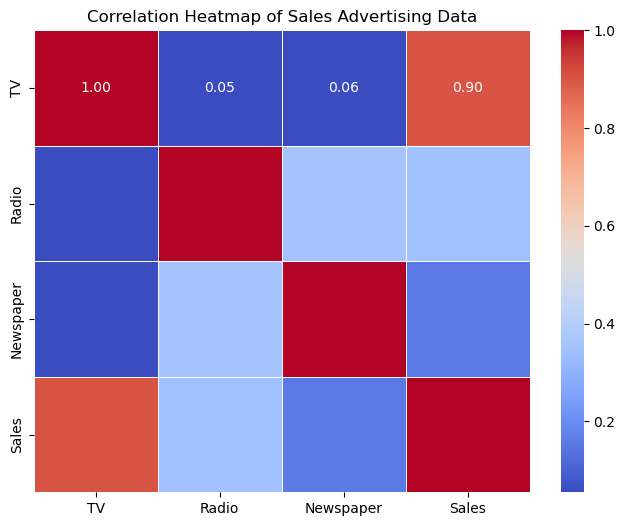

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Sales Advertising Data")
plt.show()


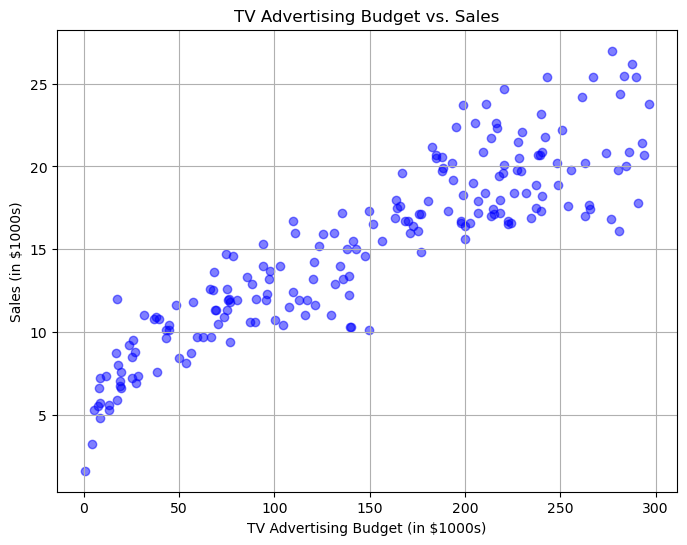

In [25]:

import matplotlib.pyplot as plt

# Scatter plot of TV advertising vs. Sales
plt.figure(figsize=(8, 6))
plt.scatter(df["TV"], df["Sales"], color="blue", alpha=0.5)
plt.xlabel("TV Advertising Budget (in $1000s)")
plt.ylabel("Sales (in $1000s)")
plt.title("TV Advertising Budget vs. Sales")
plt.grid(True)
plt.show()
